# Plotter
Convenience class for visualizing DataFrame and Series objects.

In [1]:
from plot import Plotter
from tools import DATADIR

## load example data

In [2]:
from pandas import read_csv, to_datetime

colors = "green grey yellow blue black red".split()
data = read_csv(DATADIR / 'examples/energy.csv')

# Remove whitespace and caps from column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# Consolidate columns
_ = data.pop('total')
data['hydro'] = data.pop('conv._hydro') + data.pop('ps_hydro')
data['gas'] = data.pop('lfg') + data.pop('natural_gas')

# Sort and filter
data = data.set_index('year').sort_index()
data.index = to_datetime(data.index, format='%Y')
data = data.loc['1980':, data.sum().nlargest(6).index]

data.tail()

,nuclear,coal,gas,hydro,petroleum,net_imports
year,,,,,,
2012-01-01,40775,4551.0,60198.0,25303.0,580.0,26180.0
2013-01-01,44756,4697.0,55182.0,26397.0,1007.0,25694.0
2014-01-01,43041,4325.0,55169.0,26823.0,2136.0,22103.0
2015-01-01,44620,2046.0,57668.0,26704.0,1892.0,22273.0
2016-01-01,41638,1493.0,57541.0,27150.0,643.0,26117.0


## create a Plotter object

In [3]:
show = Plotter()
show

Plotter(style='bmh')

In [4]:
show.style

'bmh'

In [5]:
show.params

{'axes': {'frame_on': False},
 'figure': {'clear': True,
  'dpi': 100,
  'edgecolor': None,
  'facecolor': None,
  'figsize': (10, 5),
  'frameon': False,
  'tight_layout': True},
 'legend': {'bbox_to_anchor': (1.05, 1),
  'borderaxespad': 0.0,
  'loc': 'upper left'}}

## modify default parameters

In [6]:
show.params['figure']['figsize'] = (9,3)
show.params

{'axes': {'frame_on': False},
 'figure': {'clear': True,
  'dpi': 100,
  'edgecolor': None,
  'facecolor': None,
  'figsize': (9, 3),
  'frameon': False,
  'tight_layout': True},
 'legend': {'bbox_to_anchor': (1.05, 1),
  'borderaxespad': 0.0,
  'loc': 'upper left'}}

## create blank figure or axes

In [7]:
fig = show.figure()

<Figure size 900x300 with 0 Axes>

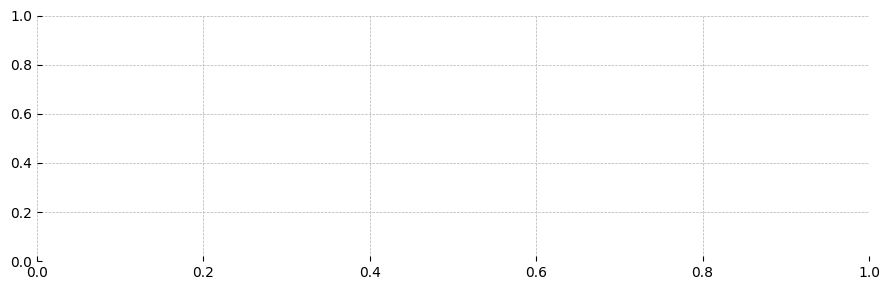

In [8]:
ax = show.axes()

## create some plots
Each method returns an `AxesSubplot` object.

<Axes: >

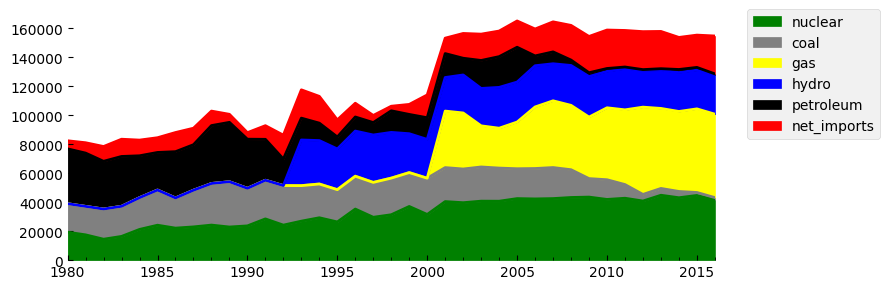

In [9]:
show.area(data, color=colors)

<Axes: >

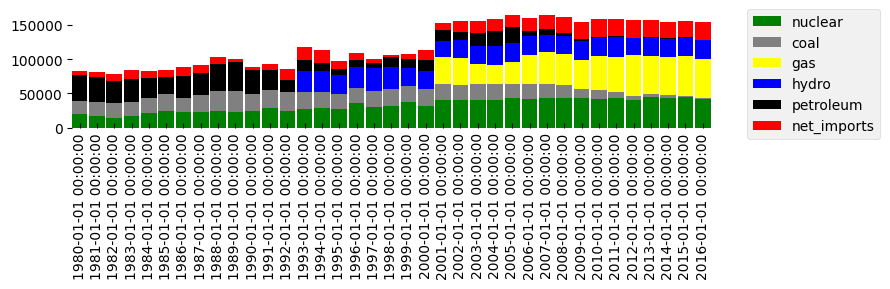

In [10]:
show.bar(data, color=colors)

<Axes: >

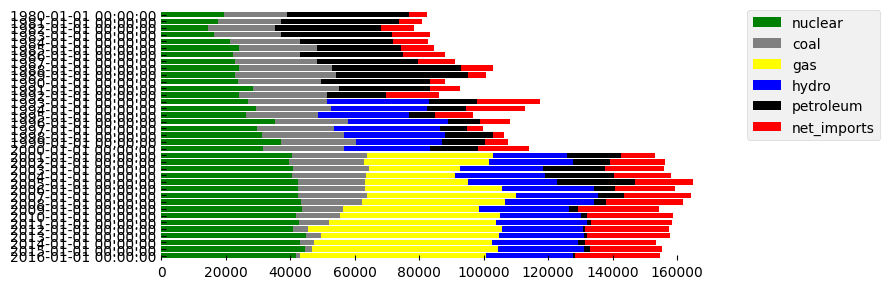

In [11]:
show.barh(data, color=colors)

<Axes: >

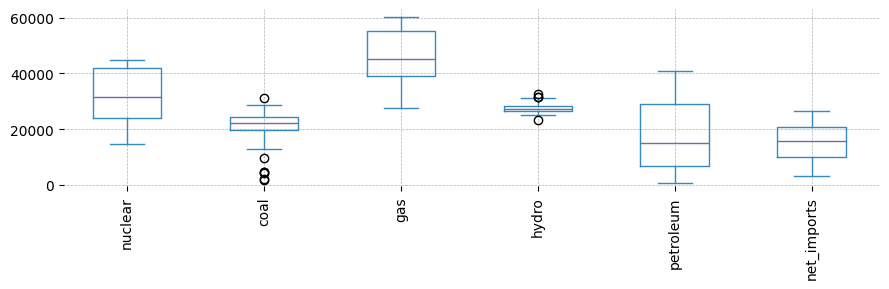

In [12]:
show.box(data)

<Axes: >

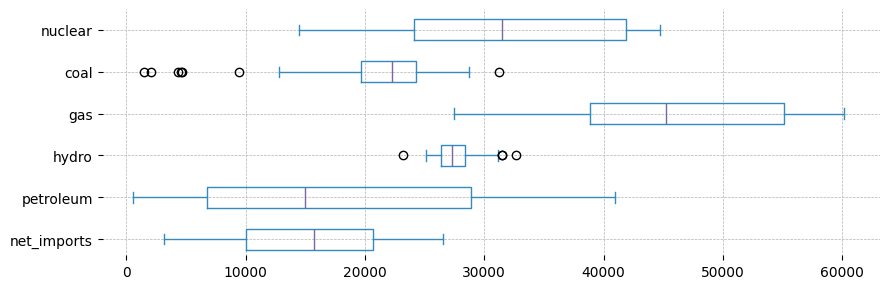

In [13]:
show.boxh(data)

<Axes: >

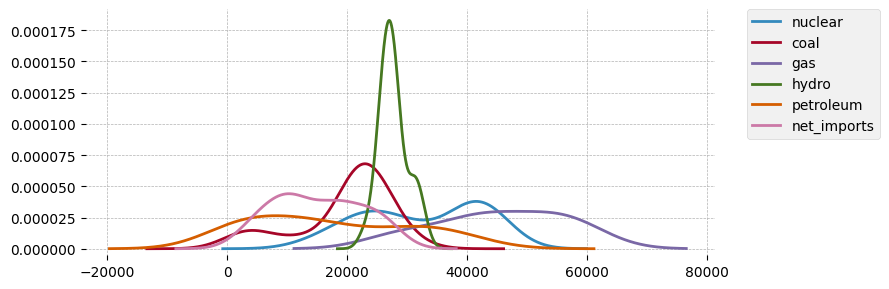

In [14]:
show.density(data)

<Axes: >

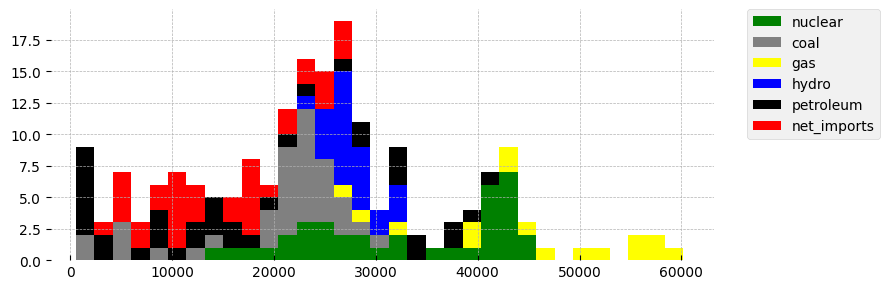

In [15]:
show.hist(data, color=colors)

<Axes: >

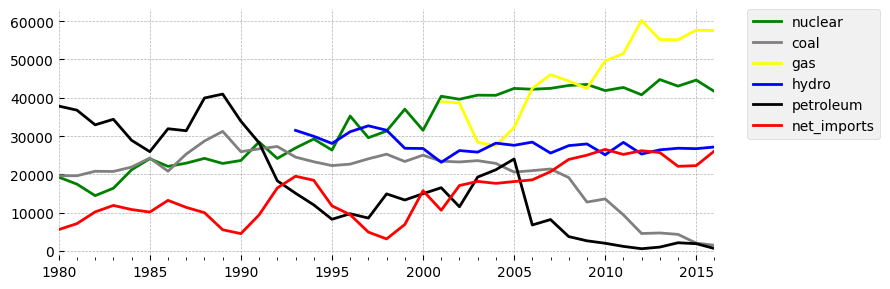

In [16]:
show.line(data, color=colors)

<Axes: >

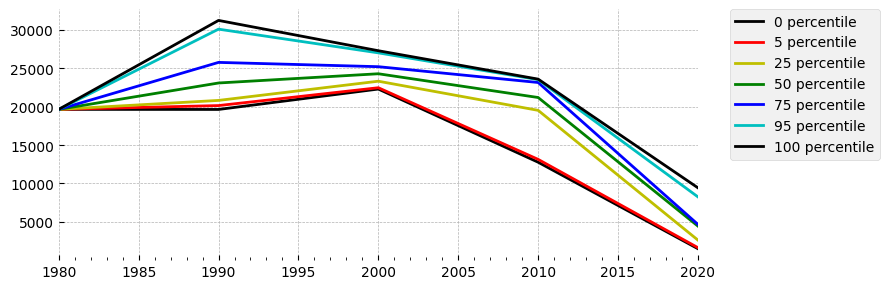

In [17]:
# .quant() only accepts timeseries inputs
show.quant(data['coal'], '10Y')

In [18]:
from pandas import Series, to_datetime

ts = data['coal'].copy()
ts.index = to_datetime(data.index, format='%Y')
ts.head()

year
1980-01-01    19643.0
1981-01-01    19632.0
1982-01-01    20807.0
1983-01-01    20753.0
1984-01-01    21902.0
Name: coal, dtype: float64

In [19]:
plot.quant(ts, '5Y')

NameError: name 'plot' is not defined

<Axes: xlabel='year', ylabel='GWh'>

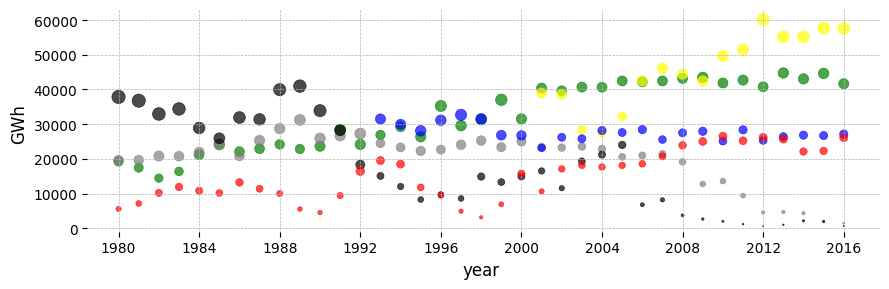

In [20]:
# .scatter() uses columns 2 & 3 as color and size (if they exist)

points = data.stack().reset_index()
points.columns = 'year source energy'.split()
points['color'] = points['source'].map(dict(zip(data.columns, colors)))
points['size'] = 200 * data.div(data.sum(axis=1), axis=0).stack().values
points = points['year energy color size'.split()]

show.scatter(points, xlabel='year', ylabel='GWh')

## modify plot style
*Caution:* This modifies matplotlib.style for **all** plots.

<Axes: >

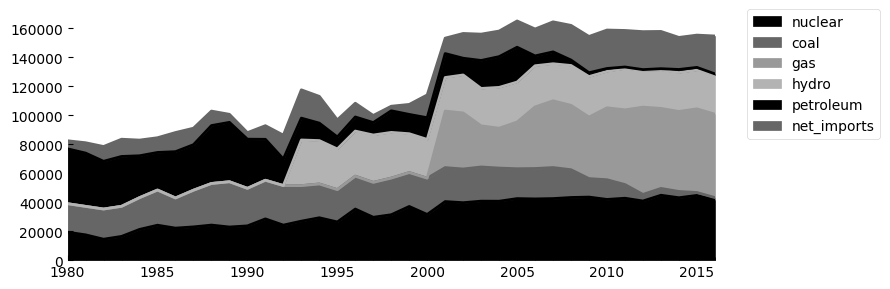

In [21]:
show.style = "grayscale"
show.area(data)

In [22]:
# Show all available styles
Plotter.styles

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

## help

In [23]:
help(Plotter)

Help on class Plotter in module plot:

class Plotter(builtins.object)
 |  Plotter(style='bmh')
 |  
 |  PANDAS plotting methods with personalized default parameters.
 |  Most methods are thin wrappers around DataFrame plot methods.
 |  
 |  Calling a Plotter() calls DataFrame.plot() with custom arguments.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, data, **kwargs)
 |      Call self as a function.
 |  
 |  __init__(self, style='bmh')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  area(self, data, **kwargs)
 |      AxesSubplot: Area plot for each column.
 |  
 |  axes(self, **kwargs)
 |      AxesSubplot: Create blank axes.
 |  
 |  bar(self, data, **kwargs)
 |      AxesSubplot: Bar plot for each column.
 |  
 |  barh(self, data, **kwargs)
 |      AxesSubplot: Horizontal bar plot for each column.
 |  
 |  box(self, data, **kwargs)
 |      AxesSubplot: Box plot for each column.
 |  
 |  boxh(self